# **1. Import Library**

Pertama-tama import library terlebih dahulu, pandas dan numpy untuk membaca dan memanipulasi data numerik, sklearn digunakan untuk membagi data dan melakukan normalisasi serta evaluasi model, tensorflow.keras untuk membangun dan melatih model DNN, dan matpolin untuk menampilkan grafik hasil.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import matplotlib.pyplot as plt

# **2. Load Dataset**

Menampilkan dataset untuk memastikan bahwa dataset siap digunakan dalam proses analisis dan pemodelan.

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **3. Pengecekan dan Cleansing Dataset**

Untuk melihat jumlah kolom dan baris, tipe data dan cek apakah ada nilai yang kosong.

In [3]:
print(df.isnull().sum())
df = df.fillna(df.mean(numeric_only=True))
df = df.drop_duplicates()
df = df.apply(pd.to_numeric, errors='coerce')
df.info()
df.describe()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               0 non-null      float64
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      0 non-null      float64
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 7.3 MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,0.0,96146.000000,96146.000000,96146.000000,0.0,96146.000000,96146.000000,96146.000000,96146.000000
mean,NaN,41.794326,0.077601,0.040803,NaN,27.321461,5.532609,138.218231,0.088220
std,NaN,22.462948,0.267544,0.197833,NaN,6.767716,1.073232,40.909771,0.283616
min,NaN,0.080000,0.000000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.000000,0.000000,NaN,23.400000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.000000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,59.000000,0.000000,0.000000,NaN,29.860000,6.200000,159.000000,0.000000
max,NaN,80.000000,1.000000,1.000000,NaN,95.690000,9.000000,300.000000,1.000000


# **4. Memisahkan Fitur dan Target**

Untuk memisahkan dataset antara fitur dan target, dari kolom age sampai kolom blood_glucose_level masuk ke target, sedangkan kolom diabetes masuk ke kolom target.

In [4]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

# **5. Membagi Data Latih dan Uji**

Membagi data latih sebesar 80% dan data uji sebesar 20% diketahui dari source code text_size=0.2.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# **6. Normalisasi Data**

Menggunakan StanderScaler agar memiliki skala yang seragam. Normalisasi sangat penting ketika menggunakan model arsitektur DNN karena model tersebut sensitif terhadap perbedaan skala antar fitur. Data latih digunakan untuk menghitung parameter normalisasi, kemudian skala yang sama diterapkan pada data uji. Tujuannya adalah agar proses latih lebih stabil dan konvergen lebih cepat.

In [6]:
scaler = StandardScaler()

x_train = pd.get_dummies(x_train, columns=['gender', 'smoking_history'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['gender', 'smoking_history'], drop_first=True)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **7. Membangun Arsitektur DNN**

Membangung arsitektur DNN dibangun untuk menggunakan arsitektur multilayer perceptron yang terdiri dari 1 input layer, 3 hidden layer dengan fungsi aktivasi relu, serta satu output layer dengan aktivasi sigmoid. Dropout ditambahkan untuk mengurangi risiko overfitting. Tujuan dari tahap ini adalah untuk membentuk struktur otak model yang akan belajar dari data.

In [7]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **8. Tampilan Aarsitektur Model**

Menampilkan jumlah layer dan parameter yang dilatih, serta bentuk input dan output tiap layer.

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

# **9. Compile Model**

Model komplikasi dengan optimizer adam karena lebih adaptif dan efisien, fungsi loss binaru crossentropy digunakan agar masalah yang dihadapi adalah klasifikasi biner, dan accuracy dipilih sebagai metrik utama dari menilai performa model. Tujuannya agar menyiapkan aturan bagaimana model akan belajar dari data.

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# **10. Training Model**

Dilatih menggunakan data latih yang sudah dibagi tadi dengan 50 epoch dan 16 batch, serta sebagian data latih digunakan sebagai validation set. Proses ini membuat model belajar mengenali pola dadri data dan secara bertahap memperbaiki bobotnya. Dengan tujuan untuk mendapatkan model yang mampu mempredisksi target dengan baik.

In [10]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.5,
    verbose=1
)

Epoch 1/50
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8961 - loss: 0.2888 - val_accuracy: 0.9587 - val_loss: 0.1144
Epoch 2/50
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9513 - loss: 0.1385 - val_accuracy: 0.9638 - val_loss: 0.1037
Epoch 3/50
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9608 - loss: 0.1146 - val_accuracy: 0.9665 - val_loss: 0.0985
Epoch 4/50
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9614 - loss: 0.1140 - val_accuracy: 0.9671 - val_loss: 0.0941
Epoch 5/50
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9637 - loss: 0.1062 - val_accuracy: 0.9702 - val_loss: 0.0910
Epoch 6/50
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9656 - loss: 0.1012 - val_accuracy: 0.9700 - val_loss: 0.0886
Epoch 7/50
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9659 - loss: 0.1032 - val_accuracy: 0.9710 - val_loss: 0.0869
Epoch 8/50
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9688 - loss: 0.095

# **11. Visualisasi Loss dan Accuracy**

Grafik ini untuk melihat perkembangan proses belajar model ( grafik loss dan accuracy), apakah locc menurun dan accuracy meningkat, serta untuk mendeteksi kemungkinan terjadinya overfitting tau underfitting, tujuannya sebagai bukti visual performa model selama training.

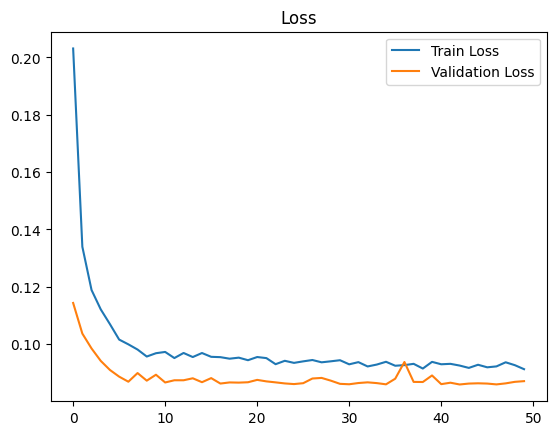

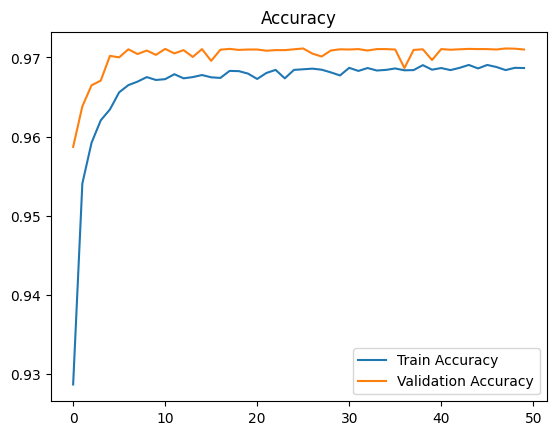

In [11]:
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

Grafik loss menunjukkan bahwa nilai kesalahan model pada data training menurun dari sekitar 0,22 hingga mendekati 0,09, sementara loss pada data validation juga turun dari sekitar 0,12 ke sekitar 0,085 dan kemudian stabil. Penurunan yang tajam di awal epoch menandakan bahwa model dengan cepat mempelajari pola dari data, sedangkan bagian yang mulai landai di epoch selanjutnya menunjukkan bahwa proses pembelajaran sudah mencapai titik konvergen. Jarak antara train loss dan validation loss yang kecil serta pola yang sama-sama menurun mengindikasikan bahwa model tidak mengalami overfitting dan mampu melakukan generalisasi dengan baik terhadap data yang belum pernah dilihat.

Sementara itu, grafik accuracy memperlihatkan bahwa akurasi training meningkat dari sekitar 92% hingga mendekati 97%, dan akurasi validation meningkat dari sekitar 96% hingga sekitar 97,2–97,3% lalu stabil. Kenaikan ini menunjukkan bahwa kemampuan model dalam melakukan prediksi semakin baik seiring bertambahnya epoch. Akurasi validation yang sedikit lebih tinggi dibandingkan training merupakan hal yang wajar dan menandakan bahwa model tidak hanya menghafal data latih, tetapi juga mampu bekerja dengan baik pada data baru. Kedua kurva yang saling berdekatan dan stabil di akhir pelatihan menegaskan bahwa model telah mencapai performa optimal dengan tingkat akurasi yang tinggi dan kondisi pembelajaran yang sehat.

# **12. Evaluasi di Data Latih**

Digunakan unutuk memprediksi data uji, hasil prediksi berupa probabilitas kemudian dikonversi menjadi kelas 0 atau 1, lalu dibandingkan dengan label asli untuk menghitung nilai akurasi. Tujuan untuk mengetahui seberapa baik model bekerja pada data baru yang belum pernah dilihat sebelumnya sehingga menjadi ukuran akhir performa model.

In [12]:
y_pred = (model.predict(x_test) > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

601/601 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 0.9706188247529901


# **13. Simpan Hasil**

In [13]:
# Simpan akurasi
with open("hasil_akurasi.txt", "w") as f:
    f.write(f"Test Accuracy: {acc}")

# Simpan hasil prediksi
hasil = pd.DataFrame({
    "y_true": y_test.values,
    "y_pred": y_pred.flatten()
})
hasil.to_csv("hasil_prediksi.csv", index=False)

print("Hasil berhasil disimpan!")


Hasil berhasil disimpan!
